In [35]:
%matplotlib inline

In [36]:
import pandas as pd
import json

In [37]:
f = open('stock_ticks')
data = pd.DataFrame((json.loads(tick) for tick in f))
data

,askPrice,askSize,bidPrice,bidSize,lastSalePrice,lastSaleSize,lastSaleTime,lastUpdated,marketPercent,symbol,volume
0,149.08,135,89.00,5000,139.060,100,1489512093772,1489512093772,0.01254,AAPL,117569
1,149.08,135,139.06,100,139.060,100,1489512093772,1489512120566,0.01254,AAPL,117569
2,149.08,135,89.00,5000,139.060,100,1489512126139,1489512126139,0.01255,AAPL,117669
3,139.11,100,89.00,5000,139.055,100,1489512128272,1489512128288,0.01256,AAPL,117769
4,139.11,100,89.00,5000,139.055,100,1489512128272,1489512129464,0.01256,AAPL,117769
5,139.11,100,89.00,5000,139.060,100,1489512135220,1489512129464,0.01257,AAPL,117869
6,139.11,100,89.00,5000,139.060,100,1489512135220,1489512142004,0.01256,AAPL,117869
7,139.11,100,89.00,5000,139.060,100,1489512135220,1489512151563,0.01256,AAPL,117869
8,139.11,100,139.05,100,139.060,100,1489512135220,1489512153009,0.01256,AAPL,117869
9,139.11,100,89.00,5000,139.060,100,1489512135220,1489512156276,0.01256,AAPL,117869


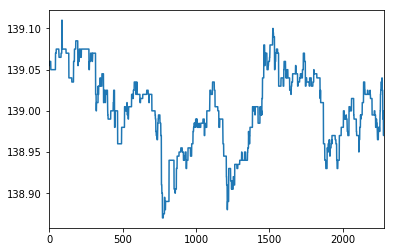

In [38]:
prices = data.lastSalePrice
prices.plot()

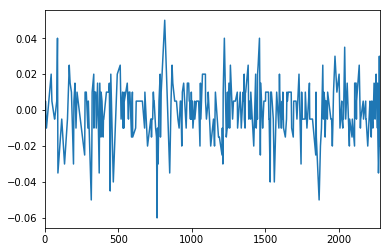

In [39]:
diffs = prices.diff()
diffs = diffs[ diffs != 0 ]
diffs.plot()

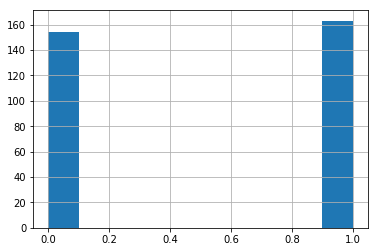

In [40]:
diffs = diffs.apply(lambda x: x > 0)
diffs.hist()

In [41]:
def make_training(series, window):
    for i in range(1, len(series)-window):
        yield {j: series.iloc[i+j] for j in range(window)}

In [42]:
window = 5
generator = make_training(diffs, window)
df = pd.DataFrame(generator)
df

,0,1,2,3,4
0,False,True,False,True,True
1,True,False,True,True,False
2,False,True,True,False,False
3,True,True,False,False,True
4,True,False,False,True,True
5,False,False,True,True,False
6,False,True,True,False,False
7,True,True,False,False,False
8,True,False,False,False,False
9,False,False,False,False,True


In [ ]:
examples = df[[0,1,2,3]]
answers = df[[4]][4]

In [43]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [45]:
clf.fit(examples, answers)
predictions = clf.predict(examples)
predictions

array([ True, False, False,  True,  True,  True, False,  True, False,
        True,  True,  True, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False,  True,  True,  True,
        True, False, False,  True, False,  True,  True,  True, False,
        True, False,  True,  True, False, False, False,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True, False,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,

In [47]:
successes = predictions == answers
successes

0       True
1       True
2       True
3       True
4       True
5      False
6       True
7      False
8       True
9       True
10      True
11      True
12      True
13      True
14     False
15      True
16     False
17      True
18      True
19      True
20      True
21     False
22     False
23      True
24      True
25      True
26      True
27     False
28     False
29     False
       ...  
281    False
282     True
283    False
284     True
285    False
286    False
287     True
288    False
289    False
290    False
291    False
292     True
293    False
294     True
295    False
296     True
297     True
298    False
299     True
300     True
301    False
302    False
303    False
304    False
305     True
306     True
307     True
308    False
309     True
310    False
Name: 4, dtype: bool

In [48]:
sum(successes) / len(examples)

0.61414790996784563